                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0
------------------------------------------------
Number of 0s in 'generated' column: 305797
Number of 1s in 'generated' column: 181438
------------------------------------------------


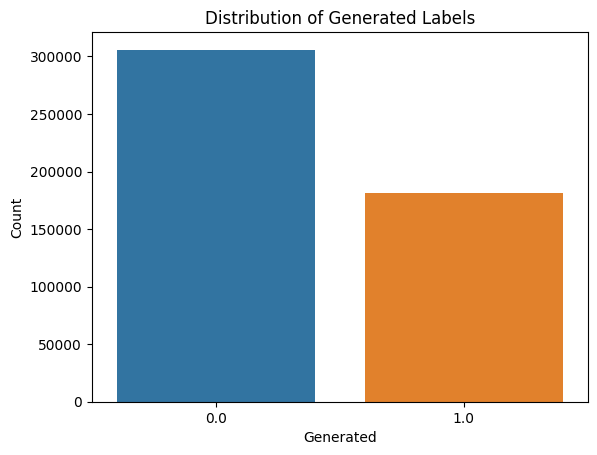

Average length of text in the 'text' column: 2269.586591685737


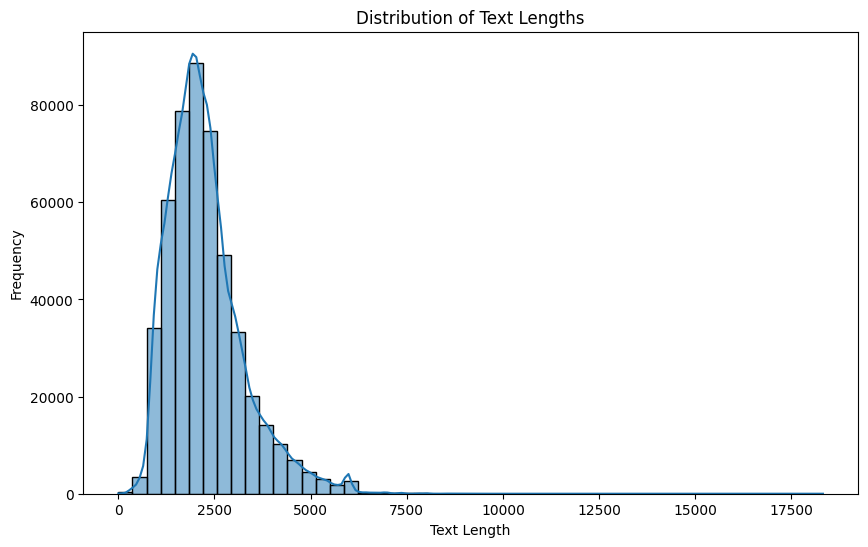

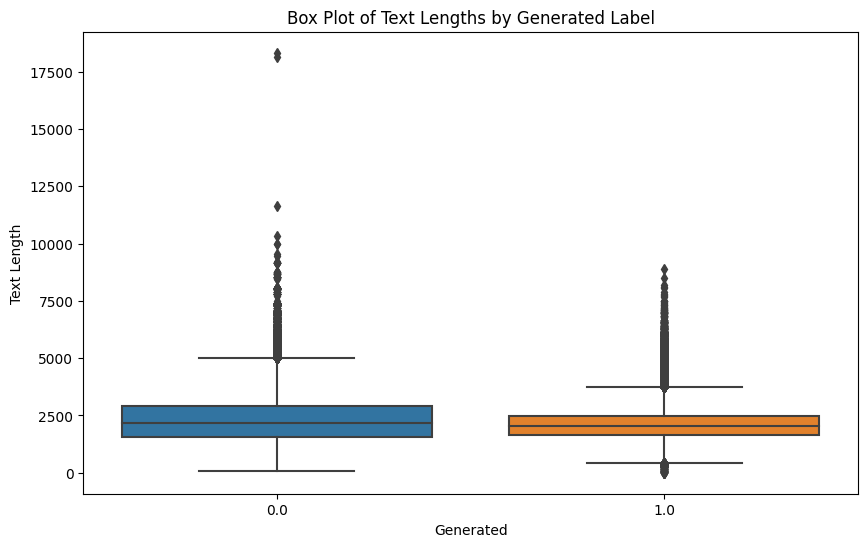

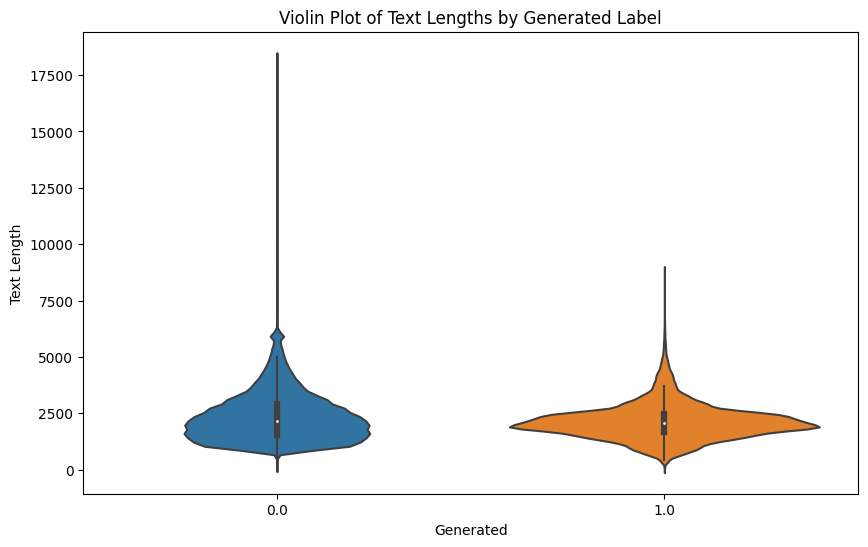

Accuracy: 0.9947253378759736
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     61112
         1.0       1.00      0.99      0.99     36335

    accuracy                           0.99     97447
   macro avg       1.00      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

# Load the dataset from Kaggle's environment
# Kaggle datasets are usually accessed from /kaggle/input/[dataset-name] directory
df = pd.read_csv('/kaggle/input/ai-human/AI_Human.csv')

# Display the first few rows of the dataset
print(df.head())

# Count the number of 0s and 1s in the 'generated' column
counts = df['generated'].value_counts()
num_zeros = counts.get(0, 0)
num_ones = counts.get(1, 0)

print('------------------------------------------------')

# Display the statistics
print(f"Number of 0s in 'generated' column: {num_zeros}")
print(f"Number of 1s in 'generated' column: {num_ones}")

# Extract features and labels
comments = df['text'].astype(str).tolist()
labels = df['generated'].tolist()

print('------------------------------------------------')

# Bar plot for distribution of 0s and 1s in the 'generated' column
sns.countplot(x='generated', data=df)
plt.title('Distribution of Generated Labels')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.show()

# Calculate the length of each text entry
df['text_length'] = df['text'].apply(len)

# Calculate the average length of the text column
average_length = df['text_length'].mean()

# Display the average length
print(f"Average length of text in the 'text' column: {average_length}")

# Suppress the specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, message="use_inf_as_na option is deprecated")

# Histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Box plot of text lengths by generated label
plt.figure(figsize=(10, 6))
sns.boxplot(x='generated', y='text_length', data=df)
plt.title('Box Plot of Text Lengths by Generated Label')
plt.xlabel('Generated')
plt.ylabel('Text Length')
plt.show()

# Violin plot of text lengths by generated label
plt.figure(figsize=(10, 6))
sns.violinplot(x='generated', y='text_length', data=df)
plt.title('Violin Plot of Text Lengths by Generated Label')
plt.xlabel('Generated')
plt.ylabel('Text Length')
plt.show()

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train a simple model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
